In [140]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *
from nba_api.stats.endpoints import playerdashptshots, leaguedashplayerbiostats

pd.options.mode.chained_assignment = None


%matplotlib widget

In [76]:
cols = ["Player","FGA","Shot_Making","Points_Added"]
df0 = pd.read_csv("NBA_Shot_Quality_V0.csv",usecols= cols)
df1 = pd.read_csv("NBA_Shot_Quality_V1.csv",usecols= cols)
df2 = pd.read_csv("NBA_Shot_Quality_V2.csv",usecols= cols)

In [77]:
df = pd.merge(pd.merge(df0,df1,on='Player',suffixes=["_0","_1"]),df2,on='Player',suffixes=["","_2"])
df = df[["Player","FGA_0","FGA_1","FGA","Shot_Making_0","Shot_Making_1","Shot_Making","Points_Added_0","Points_Added_1","Points_Added"]]
# df["Points_Added"] = df["Points_Added"]*df["FGA_1"]/df["FGA"]
# df["Points_Added"] = df["Points_Added"].round(1)
# df["FGA"] = df["FGA_1"]

In [79]:
df.nlargest(20,"Points_Added")

,Player,FGA_0,FGA_1,FGA,Shot_Making_0,Shot_Making_1,Shot_Making,Points_Added_0,Points_Added_1,Points_Added
6,Giannis Antetokounmpo,443,444,444,0.11,0.115,0.195,48.73,51.1,86.6
2,Stephen Curry,400,382,382,0.17,0.130,0.196,68.00,49.7,74.9
0,Tyrese Haliburton,350,350,350,0.20,0.191,0.208,70.00,66.9,72.8
3,Luka Doncic,498,471,471,0.11,0.124,0.150,54.78,58.2,70.6
8,LeBron James,396,384,384,0.11,0.131,0.172,43.56,50.2,66.0
5,Shai Gilgeous-Alexander,429,408,408,0.12,0.147,0.145,51.48,59.9,59.2
57,Jayson Tatum,426,426,426,0.04,0.087,0.139,17.04,36.9,59.2
1,Kevin Durant,406,406,406,0.17,0.140,0.141,69.02,56.9,57.2
7,Malik Beasley,215,215,215,0.22,0.192,0.250,47.30,41.4,53.8
12,Duncan Robinson,243,242,242,0.15,0.158,0.194,36.45,38.1,46.9


In [270]:
cols = ["Player","FGA","Shot_Making","Points_Added"]
df0 = pd.read_csv("NBA_Shot_Quality_V0.csv",usecols= cols)
df0["V"] = 0
df1 = pd.read_csv("NBA_Shot_Quality_V1.csv",usecols= cols)
df1["V"] = 1
df2 = pd.read_csv("NBA_Shot_Quality_V2.csv",usecols= cols)
df2["V"] = 2

In [302]:
n = 30
players = df2.nlargest(n,"Points_Added")["Player"].to_list()
players = df1.nlargest(n,"Points_Added")["Player"].to_list()

In [303]:
len(players)

30

In [304]:
df = pd.concat([df0,df1,df2])
df = df[df["Player"].isin(players)]
df = df.sort_values("Player").reset_index(drop=True)

In [305]:
df

,Player,FGA,Shot_Making,Points_Added,V
0,Aaron Nesmith,151,0.233,35.20,2
1,Aaron Nesmith,151,0.209,31.50,1
2,Aaron Nesmith,151,0.190,28.69,0
3,Alex Caruso,122,0.243,29.60,2
4,Alex Caruso,122,0.237,28.90,1
...,...,...,...,...,...
85,Tyrese Maxey,428,0.068,29.10,2
86,Tyrese Maxey,428,0.020,8.56,0
87,Zion Williamson,300,0.047,14.00,1
88,Zion Williamson,308,0.020,6.16,0


In [307]:
len(df)

90

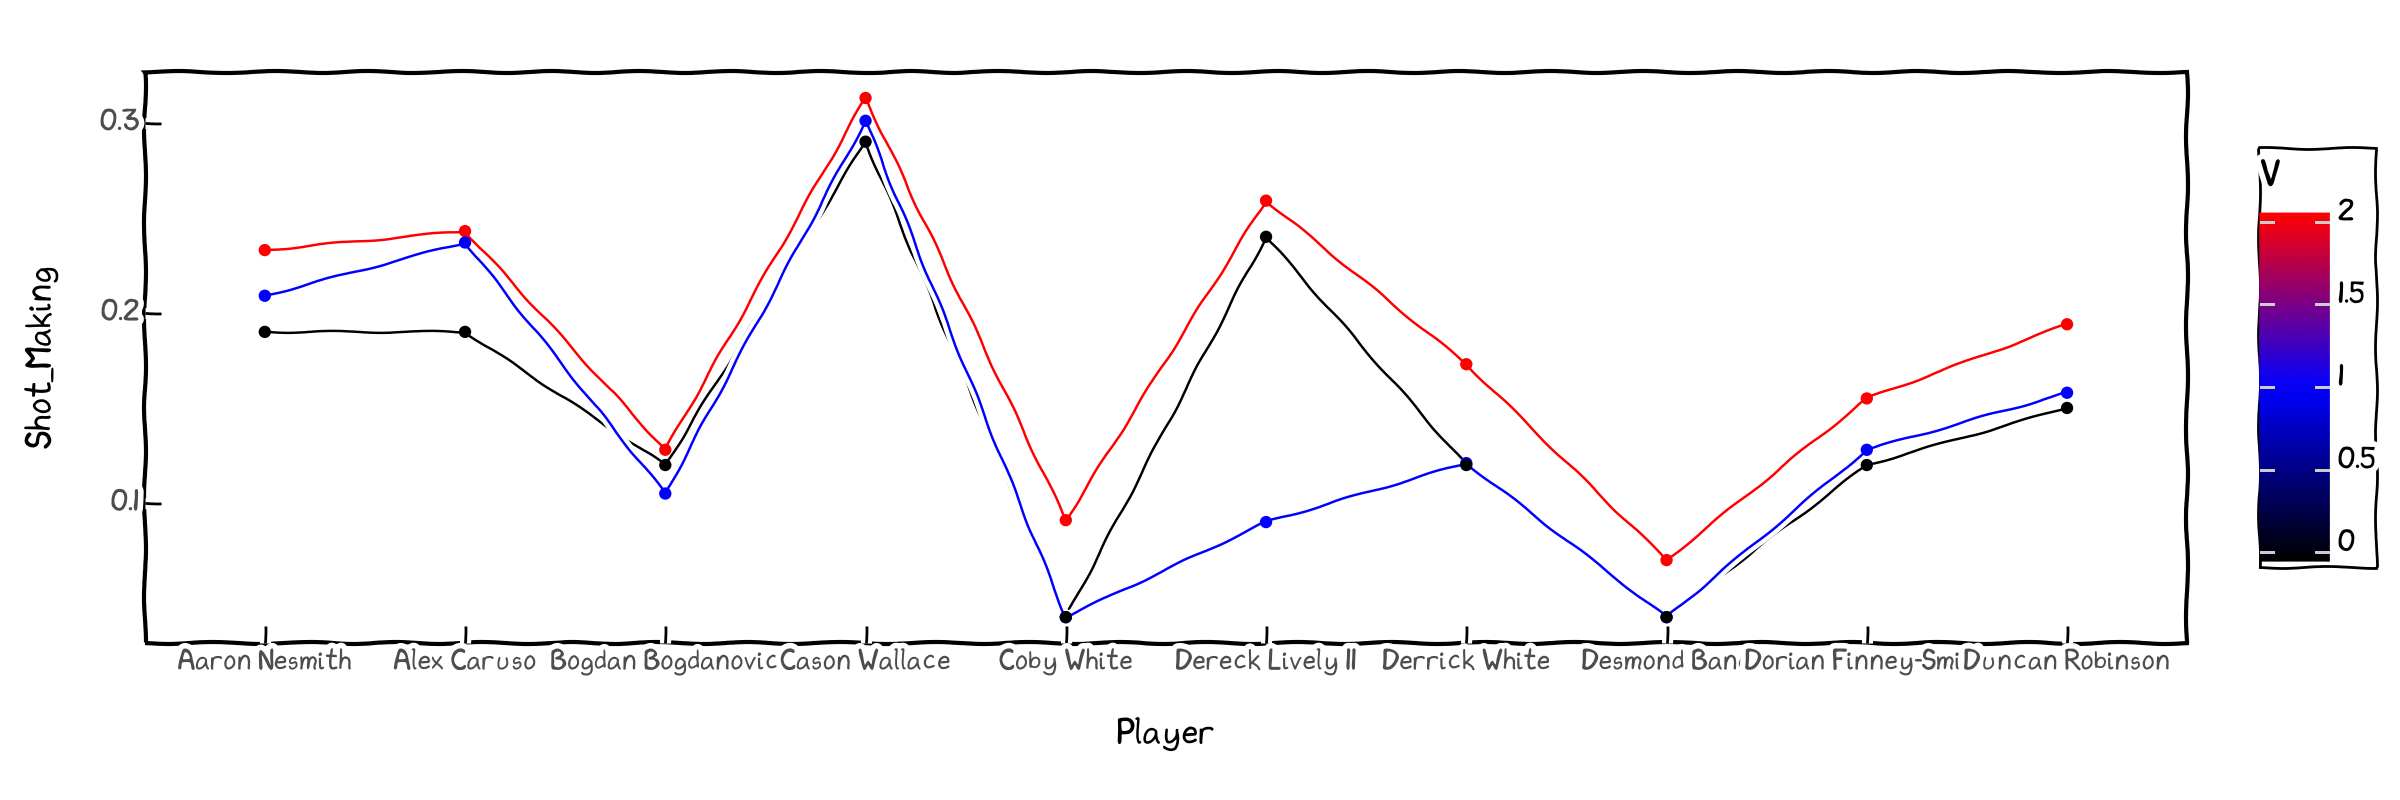

In [308]:
p = (
    ggplot(data=df[:30])
    # + aes(x="V",y="Shot_Making", group="Player")
    + aes(x="Player",y="Shot_Making", group="V",color="V")
    + theme_idv
    + geom_line()
    + geom_point()
    + scale_color_gradientn(["black","blue","red"])
    + theme(figure_size=[12,4])
)
p.save("ssqm_versions_1.png",dpi=300,verbose=False)
p.draw()

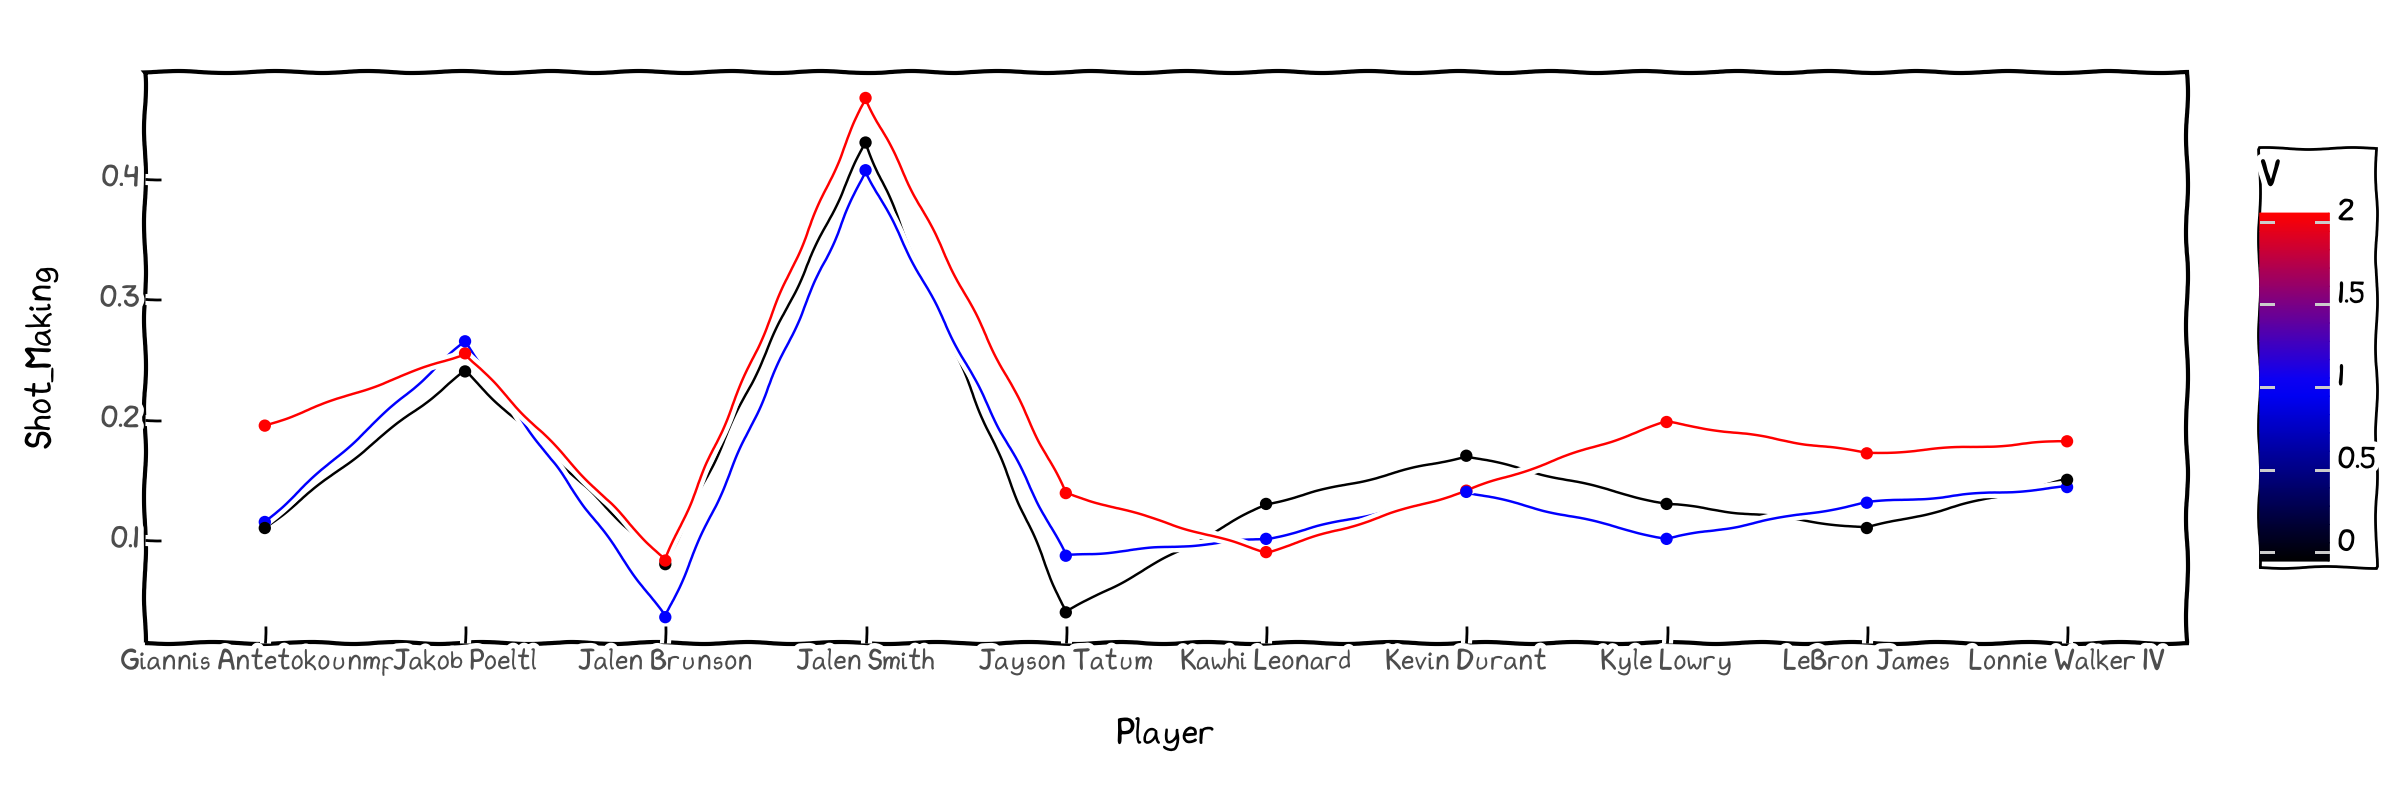

In [309]:
p = (
    ggplot(data=df[30:60])
    # + aes(x="V",y="Shot_Making", group="Player")
    + aes(x="Player",y="Shot_Making", group="V",color="V")
    + theme_idv
    + geom_line()
    + geom_point()
    + scale_color_gradientn(["black","blue","red"])
    + theme(figure_size=[12,4])
)
p.save("ssqm_versions_2.png",dpi=300,verbose=False)
p.draw()

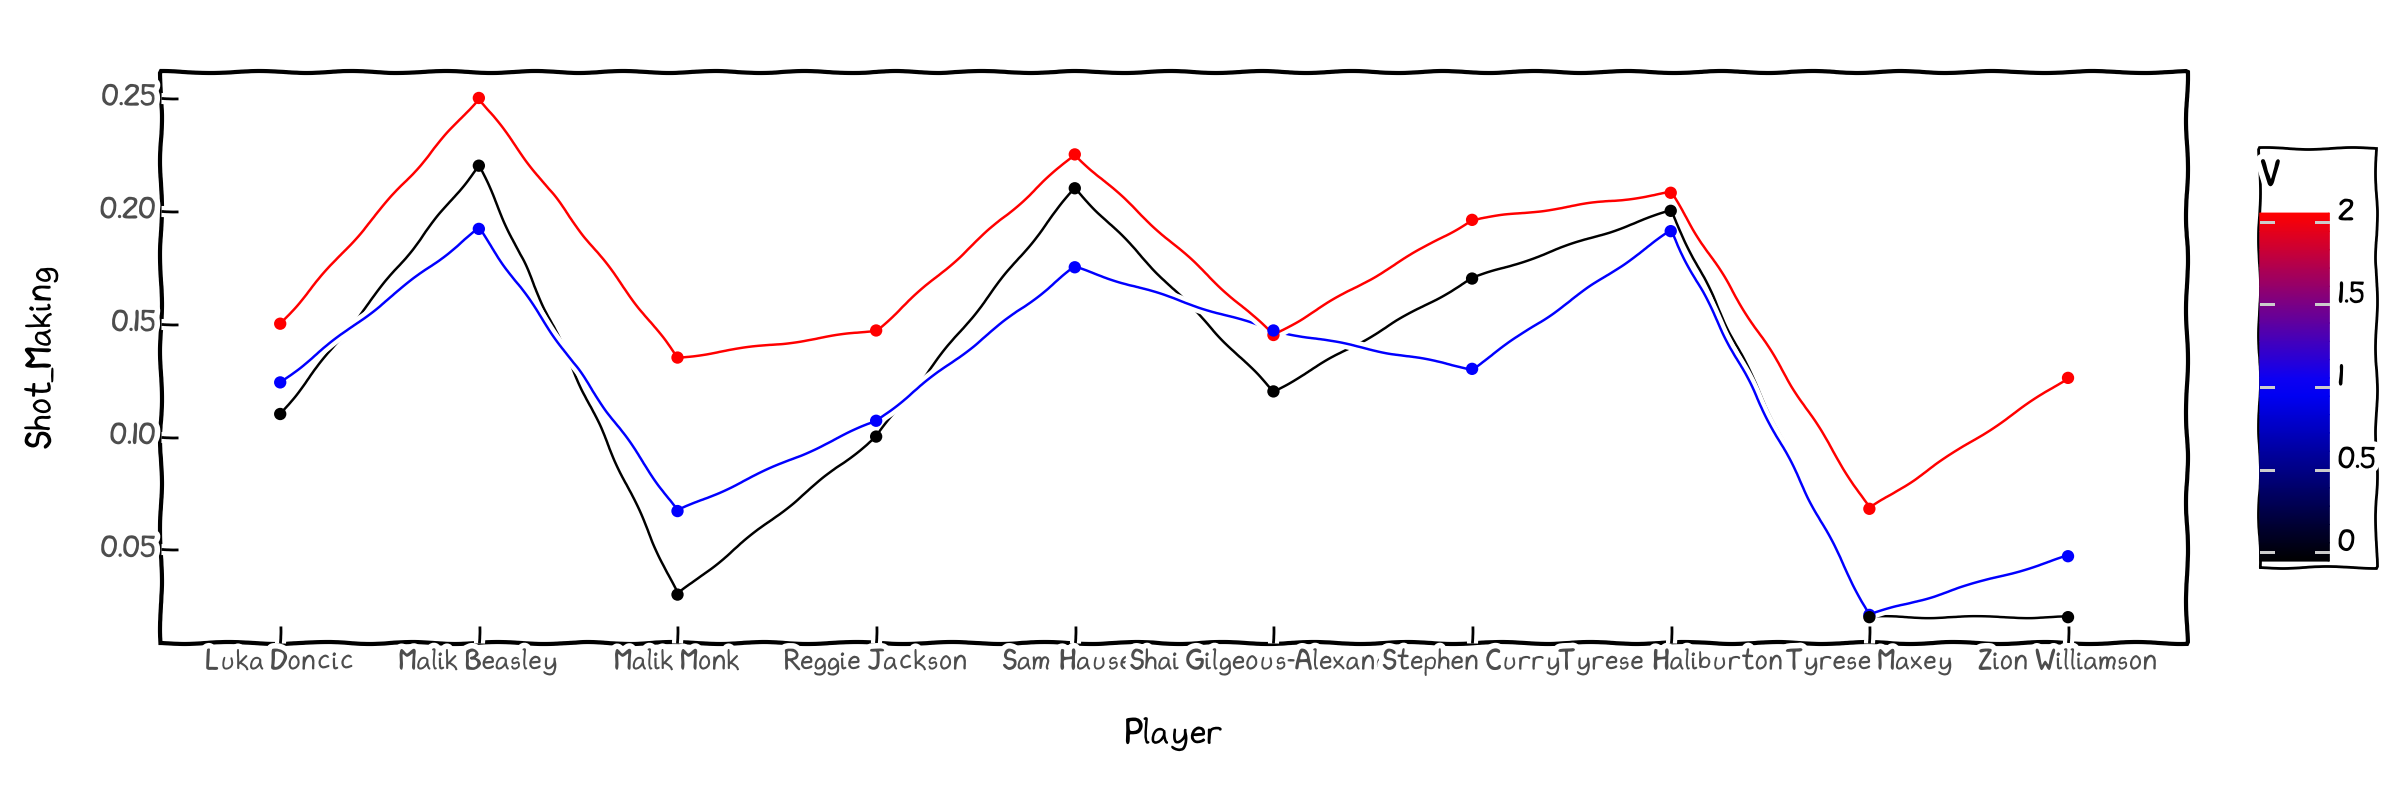

In [310]:
p = (
    ggplot(data=df[60:90])
    # + aes(x="V",y="Shot_Making", group="Player")
    + aes(x="Player",y="Shot_Making", group="V",color="V")
    + theme_idv
    + geom_line()
    + geom_point()
    + scale_color_gradientn(["black","blue","red"])
    + theme(figure_size=[12,4])
)
p.save("ssqm_versions_3.png",dpi=300,verbose=False)
p.draw()

In [311]:
# p = (
#     ggplot(data=df1)
#     # + aes(x="V",y="Shot_Making", group="Player")
#     + aes(x="Player",y="Shot_Making", group="V", color="V")
#     + theme_idv
#     # + geom_line()
#     + geom_point()
#     # + geom_boxplot()
#     # + facet_wrap(facets="~Player", ncol = 5)
#     # + scale_x_continuous(breaks = [0,1,2])
#     + theme(figure_size=[10,10])
# )
# p.draw()
# # p.save("ssqm_versions.png",dpi=300,verbose=False)